In [137]:
!pip install pystan~=2.14
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [138]:
import pandas as pd
from prophet import Prophet

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df1=pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)

<ipython-input-140-c6325d3783ef>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1=pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
Skipping line 533719: expected 23 fields, saw 24



In [141]:
df2=pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)

<ipython-input-141-2eb61b76e318>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2=pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
Skipping line 1149094: expected 23 fields, saw 41

<ipython-input-141-2eb61b76e318>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)


In [142]:
df3=pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

<ipython-input-142-41e60c9dcaf1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3=pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)


In [143]:
df1.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [144]:
data = pd.concat([df1,df2,df3])

In [145]:
data.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [146]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1223341,4041393,10418657,HZ156549,02/18/2016 10:13:00 PM,038XX W ROOSEVELT RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,OTHER,True,...,24.0,29.0,18,1151170.0,1894442.0,2016.0,02/25/2016 03:59:51 PM,41.866235,-87.720517,"(41.866235446, -87.720517147)"
1223342,4041395,10418659,HZ156558,02/18/2016 09:55:00 PM,047XX S WESTERN AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,...,12.0,58.0,26,1161163.0,1873354.0,2016.0,02/25/2016 03:59:51 PM,41.808166,-87.684417,"(41.808166046, -87.684416746)"
1223343,4041396,10418660,HZ156545,02/18/2016 10:24:00 PM,003XX S CICERO AVE,2026,NARCOTICS,POSS: PCP,SIDEWALK,True,...,24.0,25.0,18,1144455.0,1897765.0,2016.0,02/25/2016 03:59:51 PM,41.875483,-87.745085,"(41.875483068, -87.745085159)"
1223344,4041397,10418661,HZ156553,02/18/2016 07:40:00 PM,131XX S ST LAWRENCE AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,...,9.0,54.0,26,1182580.0,1818384.0,2016.0,02/25/2016 03:59:51 PM,41.656851,-87.607565,"(41.65685141, -87.607565057)"
1223345,4041398,10418662,HZ156536,02/18/2016 09:30:00 PM,016XX S STATE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,...,3.0,33.0,14,1176594.0,18.0,NaN,NaN,NaN,NaN,NaN


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793778 entries, 0 to 1223345
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                object 
 10  Domestic              object 
 11  Beat                  float64
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: floa

In [148]:
data.shape

(3793778, 23)

In [149]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 3
Date                        0
Block                       1
IUCR                        1
Primary Type                1
Description                 1
Location Description      868
Arrest                      1
Domestic                    1
Beat                        1
District                   45
Ward                       54
Community Area           1064
FBI Code                    1
X Coordinate            42032
Y Coordinate            42032
Year                        2
Updated On                  3
Latitude                42034
Longitude               42034
Location                42034
dtype: int64

In [150]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [151]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


In [152]:
df.isnull().sum()

ID                        0
Date                      0
Primary Type              1
Location Description    868
Arrest                    1
Domestic                  1
dtype: int64

In [153]:
df=df.dropna()

In [154]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [155]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792910 entries, 0 to 1223345
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                object        
 5   Domestic              object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 202.6+ MB


In [157]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [158]:
df['Primary Type'].value_counts().head(10)

THEFT                  784888
BATTERY                682719
CRIMINAL DAMAGE        442199
NARCOTICS              440871
OTHER OFFENSE          231373
ASSAULT                227444
BURGLARY               225096
MOTOR VEHICLE THEFT    165307
ROBBERY                142203
DECEPTIVE PRACTICE     140776
Name: Primary Type, dtype: int64

In [159]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

False    695857
True      89031
Name: Arrest, dtype: int64

In [160]:
df['Location Description'].value_counts().head(10)

STREET                            954748
RESIDENCE                         617904
SIDEWALK                          434569
APARTMENT                         422298
OTHER                             136459
PARKING LOT/GARAGE(NON.RESID.)    103231
ALLEY                              87696
SCHOOL, PUBLIC, BUILDING           81611
RESIDENCE-GARAGE                   74297
VEHICLE NON-COMMERCIAL             67092
Name: Location Description, dtype: int64

In [161]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

False    681204
True     273544
Name: Arrest, dtype: int64

In [162]:
df.index = pd.DatetimeIndex(df.Date)
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-02-18 22:13:00,10418657,2016-02-18 22:13:00,NARCOTICS,OTHER,True,False
2016-02-18 21:55:00,10418659,2016-02-18 21:55:00,OTHER OFFENSE,STREET,True,False
2016-02-18 22:24:00,10418660,2016-02-18 22:24:00,NARCOTICS,SIDEWALK,True,False


In [163]:
df.tail()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2016-02-18 22:13:00,10418657,2016-02-18 22:13:00,NARCOTICS,OTHER,True,False
2016-02-18 21:55:00,10418659,2016-02-18 21:55:00,OTHER OFFENSE,STREET,True,False
2016-02-18 22:24:00,10418660,2016-02-18 22:24:00,NARCOTICS,SIDEWALK,True,False
2016-02-18 19:40:00,10418661,2016-02-18 19:40:00,OTHER OFFENSE,STREET,True,False
2016-02-18 21:30:00,10418662,2016-02-18 21:30:00,CRIMINAL DAMAGE,OTHER,False,False


Text(0, 0.5, 'Number of Crimes')

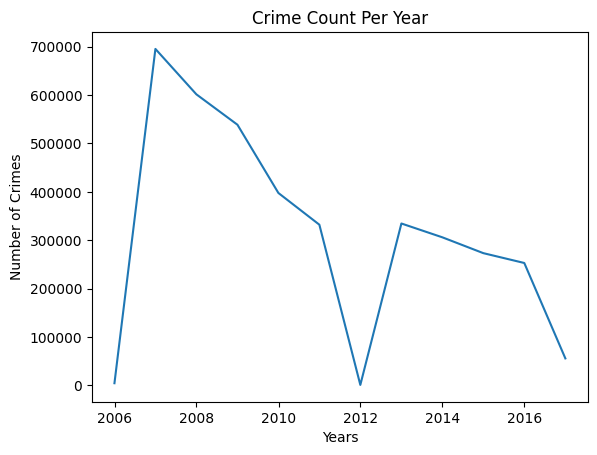

In [164]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

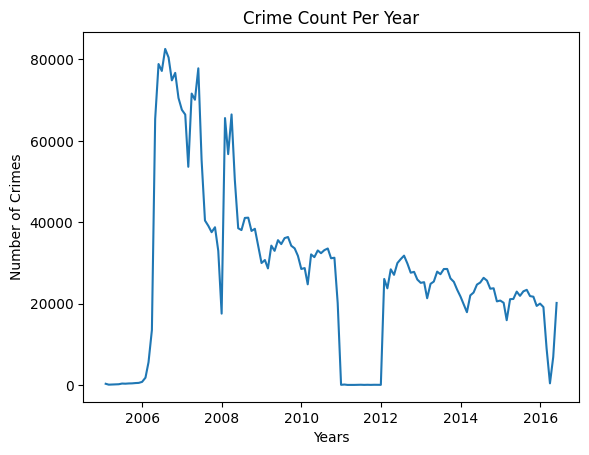

In [165]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [166]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [167]:
df_prophet.columns =['Date','Crime Count']

In [168]:
df_prophet

,Date,Crime Count
0,2005-01-31,339
1,2005-02-28,124
2,2005-03-31,151
3,2005-04-30,196
4,2005-05-31,229
...,...,...
132,2016-01-31,19180
133,2016-02-29,9050
134,2016-03-31,450
135,2016-04-30,6930


In [169]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [170]:
df_prophet

,ds,y
0,2005-01-31,339
1,2005-02-28,124
2,2005-03-31,151
3,2005-04-30,196
4,2005-05-31,229
...,...,...
132,2016-01-31,19180
133,2016-02-29,9050
134,2016-03-31,450
135,2016-04-30,6930


In [171]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6uhuirs/4a6q88fs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6uhuirs/4fg1ve_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64243', 'data', 'file=/tmp/tmps6uhuirs/4a6q88fs.json', 'init=/tmp/tmps6uhuirs/4fg1ve_z.json', 'output', 'file=/tmp/tmps6uhuirs/prophet_modelke7nihe4/prophet_model-20240305124000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [172]:
pred=m.make_future_dataframe(periods=12,freq='M')
forcast = m.predict(pred)

In [173]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,2017-01-31,17047.026135,-9024.124240,38036.580131,16993.232182,17099.769151,-2990.503003,-2990.503003,-2990.503003,-2990.503003,-2990.503003,-2990.503003,0.0,0.0,0.0,14056.523133
145,2017-02-28,16908.797133,-14236.183553,34582.586458,16842.045573,16974.452398,-6124.315072,-6124.315072,-6124.315072,-6124.315072,-6124.315072,-6124.315072,0.0,0.0,0.0,10784.482061
146,2017-03-31,16755.757879,-8760.044761,37624.665853,16672.543771,16830.666522,-1440.886111,-1440.886111,-1440.886111,-1440.886111,-1440.886111,-1440.886111,0.0,0.0,0.0,15314.871768
147,2017-04-30,16607.655376,-4124.321160,42536.096082,16510.858400,16695.098625,1805.179065,1805.179065,1805.179065,1805.179065,1805.179065,1805.179065,0.0,0.0,0.0,18412.834442
148,2017-05-31,16454.616123,-2339.806255,45266.078066,16344.013656,16556.740067,4978.670991,4978.670991,4978.670991,4978.670991,4978.670991,4978.670991,0.0,0.0,0.0,21433.287114


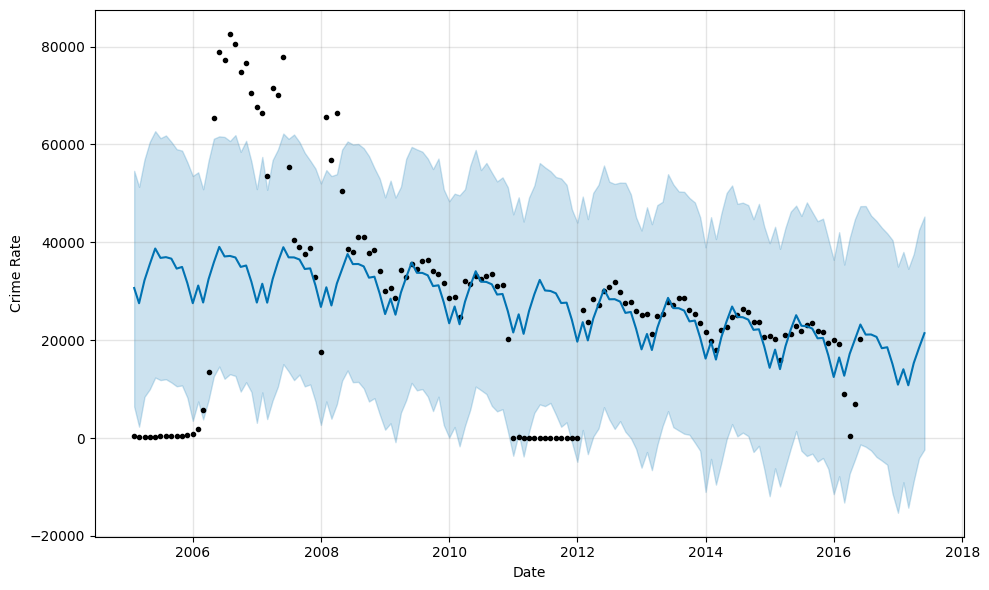

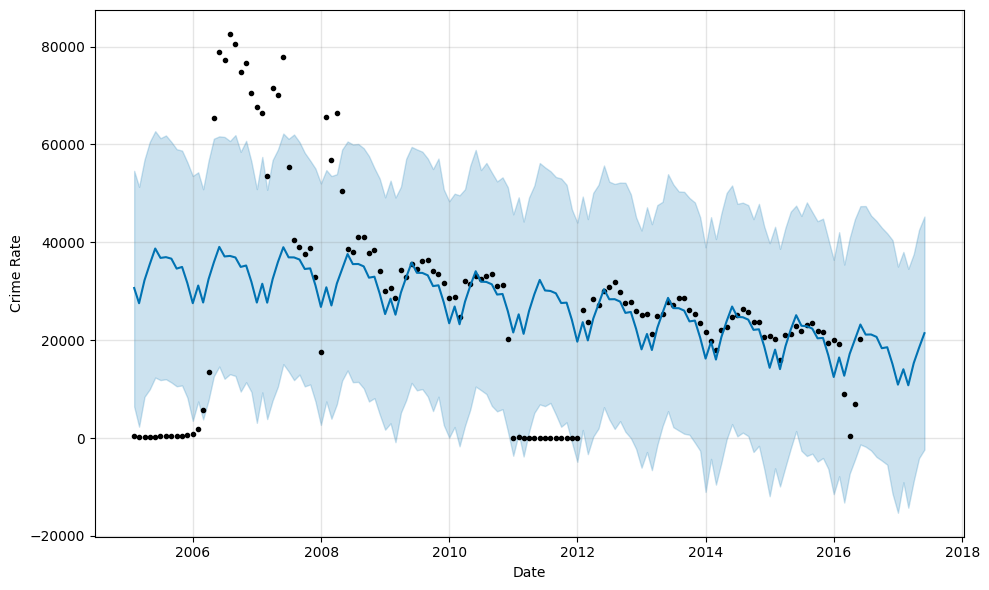

In [174]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")